In [13]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler


In [14]:
bioclim = pd.read_csv('data/csv/bioclim.csv')
bioclim = bioclim.drop(columns=['Unnamed: 0'])

In [15]:
crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
bioclim = pd.merge(bioclim, crta_coords_filtered, on=['lat', 'lon'])
bioclim = bioclim.drop_duplicates(subset=['lat', 'lon'])
bioclim = bioclim[bioclim['bio_13']!=-3.4e+38]
coords = bioclim[['lat', 'lon']]
bioclim = bioclim.drop(columns=['lat', 'lon'])
bioclim['group'] = 'osmia'
bioclim

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_1,bio_16,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi,group
0,82.0,1.100000,2.116667,29.925650,199,24.6,-2.3,125.0,18.533333,8.050000,...,9.683333,230.0,18.533333,710.95750,132.0,26.900000,36.0,230.0,0.157664,osmia
10,81.0,1.400000,2.483333,30.308643,117,24.9,-2.1,120.0,18.816666,8.183333,...,10.008333,227.0,18.816666,709.33014,125.0,27.000000,35.0,227.0,0.151344,osmia
45,71.0,1.800000,4.933333,31.550068,79,23.0,-1.3,129.0,17.350000,7.666666,...,9.391666,189.0,17.350000,634.90454,136.0,24.300000,35.0,189.0,0.178543,osmia
46,79.0,1.416667,2.500000,30.381304,106,25.1,-2.0,113.0,18.900000,8.233334,...,10.066667,220.0,18.900000,711.54870,121.0,27.100000,33.0,220.0,0.213319,osmia
54,74.0,2.416667,5.600000,33.741497,114,23.5,-1.0,147.0,17.450000,8.266666,...,9.758333,204.0,16.016666,611.29083,157.0,24.500000,43.0,200.0,0.289286,osmia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24203,64.0,2.066667,3.233333,33.107235,200,24.7,-1.1,109.0,18.383333,8.541667,...,10.029167,182.0,16.816668,663.19977,117.0,25.800001,35.0,165.0,0.241975,osmia
24204,67.0,2.250000,3.466667,33.460560,97,25.2,-1.0,117.0,18.733334,8.766666,...,10.333333,196.0,17.200000,669.74330,129.0,26.200000,38.0,175.0,0.259833,osmia
24205,76.0,2.566667,3.800000,32.403847,92,25.3,-0.7,116.0,19.133333,8.425000,...,10.687500,215.0,17.500000,674.28120,123.0,26.000000,37.0,192.0,0.220172,osmia
24206,64.0,1.983333,3.066667,30.981182,157,23.7,-1.1,125.0,17.916666,7.683333,...,9.800000,184.0,16.333334,648.14070,143.0,24.800001,41.0,165.0,0.302638,osmia


In [16]:
### PREVIOUS BIOCLIM INPUT WITH ALL OCCURRENCE POINTS

# bioclim = pd.read_csv('data/csv/bioclim.csv')
# bioclim = bioclim.drop(columns=['Unnamed: 0'])
# bioclim = bioclim[bioclim['bio_13']!=-3.4e+38]
# coords = bioclim[['lat', 'lon']]
# bioclim = bioclim.drop(columns=['lat', 'lon'])
# bioclim['group'] = 'osmia'

In [45]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)
america = america.drop(columns=['Unnamed: 0'])
america = america[america['bio_13']!= -3.4e+38]
america_points = america[['lat', 'lon']]
america = america.drop(columns=['lat', 'lon'])
america['group'] = 'america'

In [18]:
column_order = bioclim.columns.tolist()
america = america[column_order]


In [19]:
combined = pd.concat([bioclim, america], ignore_index=True)
combined_points = pd.concat([coords, america_points])

In [20]:
combined.iloc[14]

bio_13         71.0
bio_11          2.5
bio_9           3.7
bio_3     32.788464
elev             90
bio_5          25.3
bio_6          -0.7
bio_17        120.0
bio_10    19.016666
bio_2         8.525
bio_15    20.050028
bio_12        609.0
bio_1     10.579166
bio_16        197.0
bio_8     17.366667
bio_4     672.14197
bio_19        126.0
bio_7          26.0
bio_14         37.0
bio_18        183.0
ndvi        0.16921
group         osmia
Name: 14, dtype: object

In [21]:
combined_points

,lat,lon
0,51.024975,13.708278
10,51.024975,13.791615
45,52.274952,10.541514
46,51.074970,13.708281
54,50.523056,7.317993
...,...,...
6600,54.000000,-65.707071
6601,54.000000,-65.030303
6602,54.000000,-64.353535
6603,54.000000,-63.676768


In [22]:
combined_vars = combined.drop(columns=['group'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(combined_vars)
combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
combined_scaled

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_12,bio_1,bio_16,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi
0,-0.271195,0.217134,-0.192464,-0.616965,-0.464262,-0.305883,0.430635,-0.104645,-0.065032,-0.872280,...,-0.310386,0.098217,-0.231822,0.687064,-0.308889,-0.314647,-0.582890,-0.137355,0.138798,-1.016327
1,-0.296035,0.256443,-0.155440,-0.559670,-0.607882,-0.240577,0.453573,-0.177338,0.006335,-0.828989,...,-0.367786,0.162558,-0.258453,0.728424,-0.315418,-0.376992,-0.571594,-0.184326,0.103351,-1.089214
2,-0.544445,0.308855,0.091951,-0.373954,-0.674437,-0.654182,0.545322,-0.046491,-0.363097,-0.996742,...,-0.460264,0.040475,-0.595781,0.514324,-0.614020,-0.279021,-0.876593,-0.184326,-0.345644,-0.775515
3,-0.345717,0.258627,-0.153757,-0.548800,-0.627148,-0.197039,0.465042,-0.279108,0.027326,-0.812755,...,-0.415619,0.174107,-0.320593,0.740589,-0.306517,-0.412617,-0.560298,-0.278266,0.020641,-0.374432
4,-0.469922,0.389657,0.159268,-0.046119,-0.613136,-0.545339,0.579729,0.215203,-0.337909,-0.801932,...,-0.205152,0.113065,-0.462625,0.319688,-0.708760,-0.091988,-0.854001,0.191436,-0.215672,0.501732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,0.275306,-2.737593,-2.417293,-1.825327,0.071687,-1.829693,-2.654443,0.069818,-2.050734,-0.166096,...,0.139248,-2.731962,0.309678,-0.592671,2.037502,-0.207770,1.665066,0.003555,0.599609,-0.609969
12890,0.300147,-2.656792,-2.509854,-1.964724,0.003379,-2.047380,-2.574162,0.244280,-2.172479,-0.423136,...,0.155193,-2.711340,0.247538,-0.534279,1.875134,-0.163239,1.473030,0.191436,0.776844,-3.836293
12891,0.424351,-2.672078,-2.375220,-1.739897,0.062929,-1.764387,-2.585631,0.404204,-2.025545,-0.101160,...,0.330582,-2.692368,0.416202,-0.578073,1.970329,-0.047456,1.631177,0.379317,0.776844,-1.040636
12892,0.349829,-2.556335,-2.432439,-1.865284,0.003379,-2.330373,-2.470944,0.593205,-2.332006,-0.479956,...,0.375227,-2.702266,0.300801,-0.626732,1.625411,0.050514,1.224512,0.614169,0.847738,-3.786470


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(combined_scaled)
combined['PC1'] = pca_result[:,0]
combined['PC2'] = pca_result[:,1]
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.32666837 0.28043887]


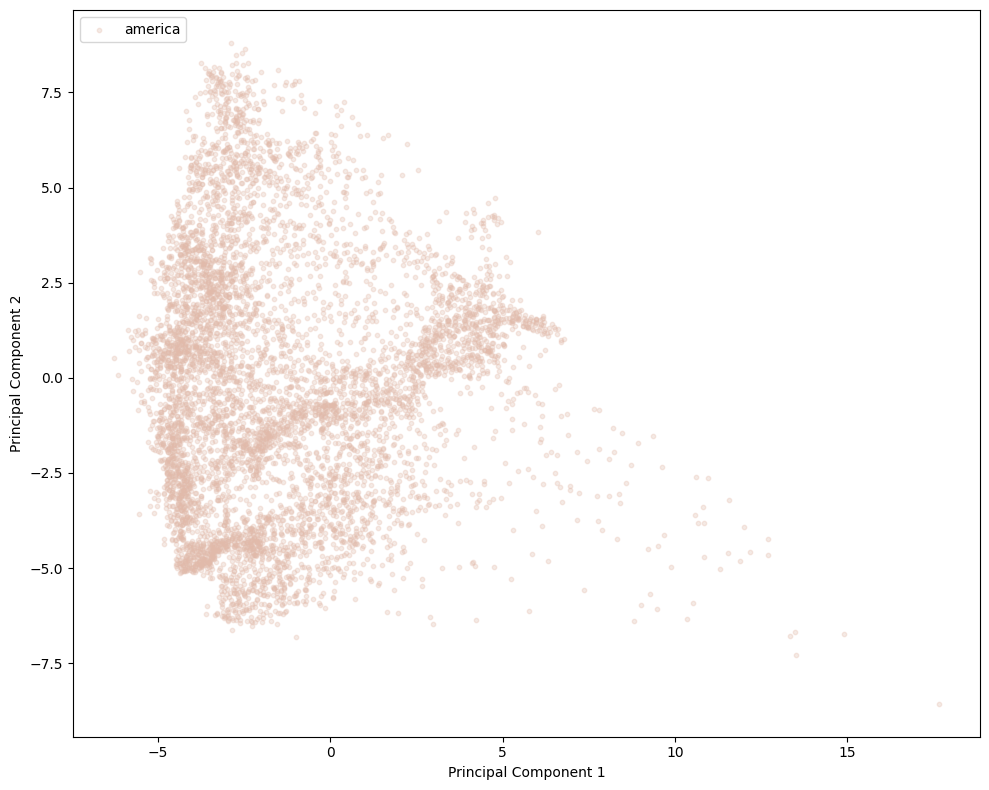

In [24]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

unique_labels = sorted(combined['group'].unique())  
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.3)
    break
plt.legend(loc='upper left')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
# plt.savefig('figures/pca_america.png')

In [25]:
combined_scaled

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_12,bio_1,bio_16,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi
0,-0.271195,0.217134,-0.192464,-0.616965,-0.464262,-0.305883,0.430635,-0.104645,-0.065032,-0.872280,...,-0.310386,0.098217,-0.231822,0.687064,-0.308889,-0.314647,-0.582890,-0.137355,0.138798,-1.016327
1,-0.296035,0.256443,-0.155440,-0.559670,-0.607882,-0.240577,0.453573,-0.177338,0.006335,-0.828989,...,-0.367786,0.162558,-0.258453,0.728424,-0.315418,-0.376992,-0.571594,-0.184326,0.103351,-1.089214
2,-0.544445,0.308855,0.091951,-0.373954,-0.674437,-0.654182,0.545322,-0.046491,-0.363097,-0.996742,...,-0.460264,0.040475,-0.595781,0.514324,-0.614020,-0.279021,-0.876593,-0.184326,-0.345644,-0.775515
3,-0.345717,0.258627,-0.153757,-0.548800,-0.627148,-0.197039,0.465042,-0.279108,0.027326,-0.812755,...,-0.415619,0.174107,-0.320593,0.740589,-0.306517,-0.412617,-0.560298,-0.278266,0.020641,-0.374432
4,-0.469922,0.389657,0.159268,-0.046119,-0.613136,-0.545339,0.579729,0.215203,-0.337909,-0.801932,...,-0.205152,0.113065,-0.462625,0.319688,-0.708760,-0.091988,-0.854001,0.191436,-0.215672,0.501732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,0.275306,-2.737593,-2.417293,-1.825327,0.071687,-1.829693,-2.654443,0.069818,-2.050734,-0.166096,...,0.139248,-2.731962,0.309678,-0.592671,2.037502,-0.207770,1.665066,0.003555,0.599609,-0.609969
12890,0.300147,-2.656792,-2.509854,-1.964724,0.003379,-2.047380,-2.574162,0.244280,-2.172479,-0.423136,...,0.155193,-2.711340,0.247538,-0.534279,1.875134,-0.163239,1.473030,0.191436,0.776844,-3.836293
12891,0.424351,-2.672078,-2.375220,-1.739897,0.062929,-1.764387,-2.585631,0.404204,-2.025545,-0.101160,...,0.330582,-2.692368,0.416202,-0.578073,1.970329,-0.047456,1.631177,0.379317,0.776844,-1.040636
12892,0.349829,-2.556335,-2.432439,-1.865284,0.003379,-2.330373,-2.470944,0.593205,-2.332006,-0.479956,...,0.375227,-2.702266,0.300801,-0.626732,1.625411,0.050514,1.224512,0.614169,0.847738,-3.786470


In [26]:
X = combined_scaled
y = combined['group']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



In [27]:
unique_labels = ['osmia', 'america']
centroids = {}
for label in unique_labels:
    centroids[label] = np.mean(X_pca[y == label], axis=0)

In [28]:
ranges = {}
for label in unique_labels:
    distances = np.sqrt(np.sum((X_pca[y == label] - centroids[label])**2, axis=1))
    ranges[label] = np.std(distances)


In [29]:
overlap_points = {}
for label1 in unique_labels:
    overlap_points[label1] = []
    for i, point in enumerate(X_pca[y == label1]):
        for label2 in unique_labels:
            if label1 != label2:
                distance = np.sqrt(np.sum((point - centroids[label2])**2))
                if distance < ranges[label2]:
                    overlap_points[label1].append(i)  # Store index of overlapping point

overlap_points

{'osmia': [0,
  1,
  2,
  3,
  7,
  8,
  14,
  19,
  21,
  22,
  24,
  25,
  34,
  36,
  50,
  58,
  63,
  70,
  71,
  75,
  76,
  79,
  83,
  87,
  89,
  93,
  94,
  95,
  98,
  100,
  101,
  104,
  127,
  128,
  137,
  140,
  142,
  144,
  146,
  153,
  155,
  159,
  163,
  164,
  172,
  179,
  188,
  189,
  191,
  194,
  250,
  349,
  370,
  385,
  463,
  503,
  509,
  516,
  522,
  532,
  538,
  554,
  565,
  589,
  605,
  607,
  617,
  631,
  640,
  661,
  666,
  689,
  704,
  719,
  722,
  741,
  752,
  755,
  783,
  784,
  794,
  797,
  811,
  824,
  842,
  851,
  885,
  894,
  905,
  917,
  923,
  924,
  932,
  934,
  958,
  971,
  990,
  1003,
  1004,
  1014,
  1015,
  1022,
  1025,
  1029,
  1034,
  1057,
  1059,
  1071,
  1072,
  1077,
  1087,
  1088,
  1101,
  1104,
  1107,
  1110,
  1121,
  1127,
  1143,
  1150,
  1151,
  1156,
  1157,
  1191,
  1201,
  1214,
  1232,
  1242,
  1243,
  1246,
  1253,
  1257,
  1265,
  1269,
  1279,
  1288,
  1294,
  1298,
  1304,
  1308,
  1

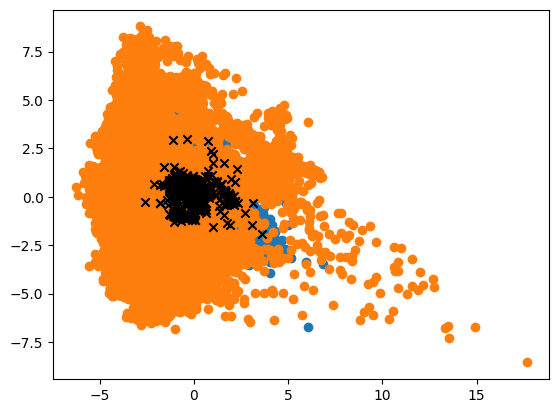

In [30]:
for label in unique_labels:
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)
for label in overlap_points:
    # Select overlapping points for the current group
    overlapping_points = X_pca[overlap_points[label]]

    # Plot overlapping points with a different marker and/or color
    plt.scatter(overlapping_points[:, 0], overlapping_points[:, 1], marker='x', color='black', label=f'Overlap {label}')


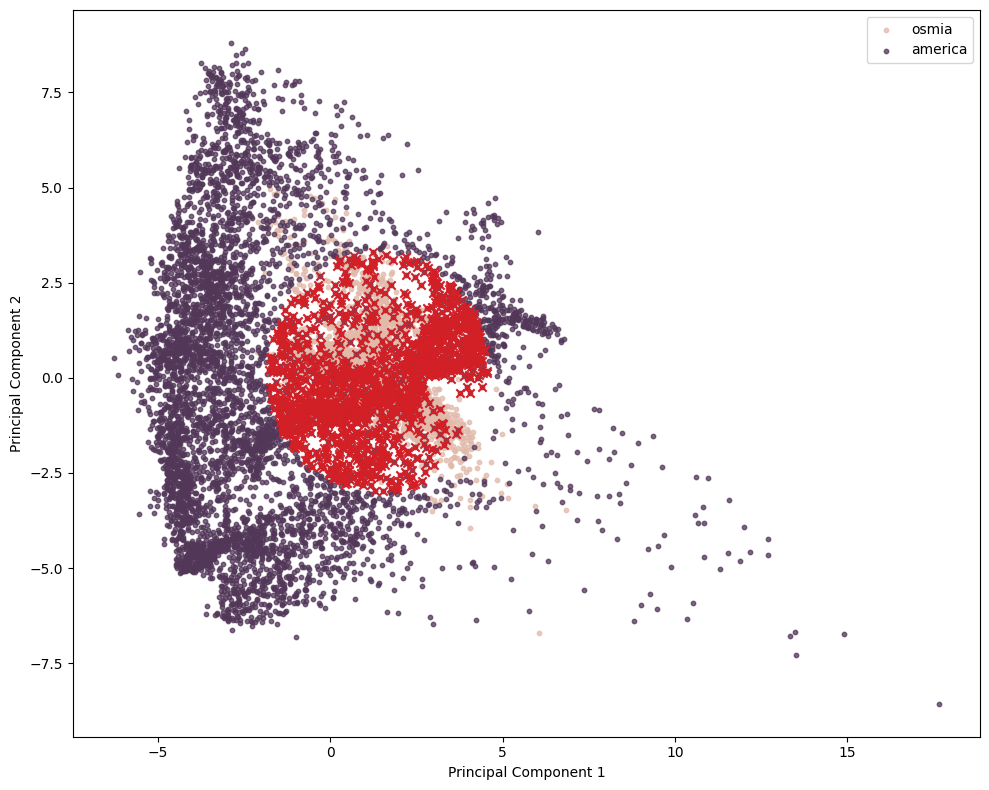

In [31]:
# Calculate centroids
centroid_osmia = np.mean(X_pca[y == 'osmia'], axis=0)

# Define a range for overlap, using standard deviation as an example
std_dev_osmia = np.std(np.sqrt(np.sum((X_pca[y == 'osmia'] - centroid_osmia)**2, axis=1)))

# Find overlapping points in 'America'
overlap_indices = []
for i, point in enumerate(X_pca[y == 'america']):
    distance = np.sqrt(np.sum((point - centroid_osmia)**2))
    if distance < std_dev_osmia*4:
        overlap_indices.append(i)

overlapping_points = X_pca[y == 'america'][overlap_indices]
plt.figure(figsize=(10, 8))
# Plot all PCA points
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.76)
# plt.scatter(X_pca[y == 'osmia', 0], X_pca[y == 'osmia', 1], label='osmia', color='green')
# plt.scatter(X_pca[y == 'america', 0], X_pca[y == 'america', 1], label='America', color='blue')

# Highlight overlapping points
plt.scatter(overlapping_points[:, 0], overlapping_points[:, 1], c='#D31F26', marker='x')

# Labeling the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('PCA of the Dataset with Overlapping Points Highlighted')
plt.legend()

plt.tight_layout()
plt.savefig('figures/pca2.png')


In [32]:
test_points = america_points.iloc[overlap_indices]
test_points.to_csv('test_points.csv', index=False)

In [34]:
combined

,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_8,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi,group,PC1,PC2
0,82.0,1.100000,2.116667,29.925650,199,24.6,-2.3,125.0,18.533333,8.050000,...,18.533333,710.95750,132.0,26.900000,36.0,230.0,0.157664,osmia,0.110054,0.104958
1,81.0,1.400000,2.483333,30.308643,117,24.9,-2.1,120.0,18.816666,8.183333,...,18.816666,709.33014,125.0,27.000000,35.0,227.0,0.151344,osmia,0.022147,0.281702
2,71.0,1.800000,4.933333,31.550068,79,23.0,-1.3,129.0,17.350000,7.666666,...,17.350000,634.90454,136.0,24.300000,35.0,189.0,0.178543,osmia,0.395462,0.316458
3,79.0,1.416667,2.500000,30.381304,106,25.1,-2.0,113.0,18.900000,8.233334,...,18.900000,711.54870,121.0,27.100000,33.0,220.0,0.213319,osmia,0.042755,0.339540
4,74.0,2.416667,5.600000,33.741497,114,23.5,-1.0,147.0,17.450000,8.266666,...,16.016666,611.29083,157.0,24.500000,43.0,200.0,0.289286,osmia,1.122337,0.304055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,104.0,-21.450000,-19.916666,21.848290,505,17.6,-29.2,137.0,10.650000,10.225000,...,9.766666,1295.78710,144.0,46.800003,39.0,269.0,0.192897,america,-2.718449,-6.247843
12890,105.0,-20.833334,-20.833334,20.916483,466,16.6,-28.5,149.0,10.166667,9.433333,...,10.166667,1255.31750,149.0,45.100000,43.0,284.0,-0.086839,america,-2.996912,-6.263690
12891,110.0,-20.950000,-19.500000,22.419355,500,17.9,-28.6,160.0,10.750000,10.425000,...,9.866667,1279.04460,162.0,46.500000,47.0,284.0,0.155556,america,-2.308839,-6.284350
12892,107.0,-20.066666,-20.066666,21.581196,466,15.3,-27.6,173.0,9.533334,9.258333,...,9.533334,1193.07500,173.0,42.900000,52.0,290.0,-0.082520,america,-2.270532,-6.410358


In [35]:
america_points = X_pca[y == 'america']
osmia_points = X_pca[y == 'osmia']

threshold_distance = 0.05
close_points_indices = []

for i, america_point in enumerate(america_points):
    for osmia_point in osmia_points:
        distance = np.linalg.norm(america_point - osmia_point)
        if distance <= threshold_distance:
            close_points_indices.append(i)
            break  

close_america_points = america_points[close_points_indices]

In [36]:
america_pts = X_pca[y == 'america']
osmia_points = X_pca[y == 'osmia']

# shortest_distances = []
# america_indices = np.where(y == 'america')[0]  # Indices of America points in the PCA data

# for idx, america_point in zip(america_indices, america_pts):
#     distances = [np.linalg.norm(america_point - osmia_point) for osmia_point in osmia_points]
#     shortest_distance = min(distances)
#     shortest_distances.append((idx, shortest_distance))

In [37]:
shortest_distances_only = []

for america_point in america_pts:
    # Calculate distances from this America point to all Osmia points
    distances = [np.linalg.norm(america_point - osmia_point) for osmia_point in osmia_points]
    
    # Find the shortest distance for this America point
    shortest_distance = min(distances)
    
    # Add the shortest distance to the list
    shortest_distances_only.append(shortest_distance)

In [38]:
shortest_distances_only

[3.658926047543716,
 3.3726492412138382,
 2.5797477759732197,
 2.5188077943971745,
 0.35449941634622784,
 0.09622606928424741,
 0.530083367938768,
 1.5721560742172822,
 2.5723100709131406,
 2.578993535464507,
 2.1811707344169617,
 0.8048222185412832,
 0.3481005792401347,
 0.1926525847777794,
 0.7894454853763395,
 1.7169720090348892,
 1.145805508542906,
 3.4643577354875674,
 2.2471772932008287,
 2.3572435711623774,
 2.2597282880069236,
 2.209170486523615,
 0.24784186808179706,
 0.31102814503826015,
 0.7524781549462105,
 2.1880399592670297,
 2.266347668339969,
 1.8656360525229614,
 2.4480240993850257,
 0.8563230540861355,
 0.27871140378025416,
 0.20000186183750104,
 0.7716854750865837,
 1.6659953711156503,
 1.4044154939783606,
 2.754363373455679,
 3.342856163543987,
 2.229304197254371,
 2.114539749046035,
 0.04486191708718305,
 0.16607162196505817,
 0.21687372696687443,
 1.7042047816685724,
 2.1521052822159894,
 2.294936901795513,
 2.9612838310301024,
 2.230235483192589,
 1.6885199614340

In [39]:
# adjusted_distances = [(idx - 32851, dist) for idx, dist in shortest_distances]
# adjusted_distances[-1]

In [40]:
# distance_df = pd.DataFrame(shortest_distances, columns=['Index', 'Shortest_Distance'])

# # Merge with the original data (if 'df' is your original DataFrame)
# original_with_distances = pd.merge(df, distance_df, left_index=True, right_on='Index')

In [41]:
len(close_america_points)

464

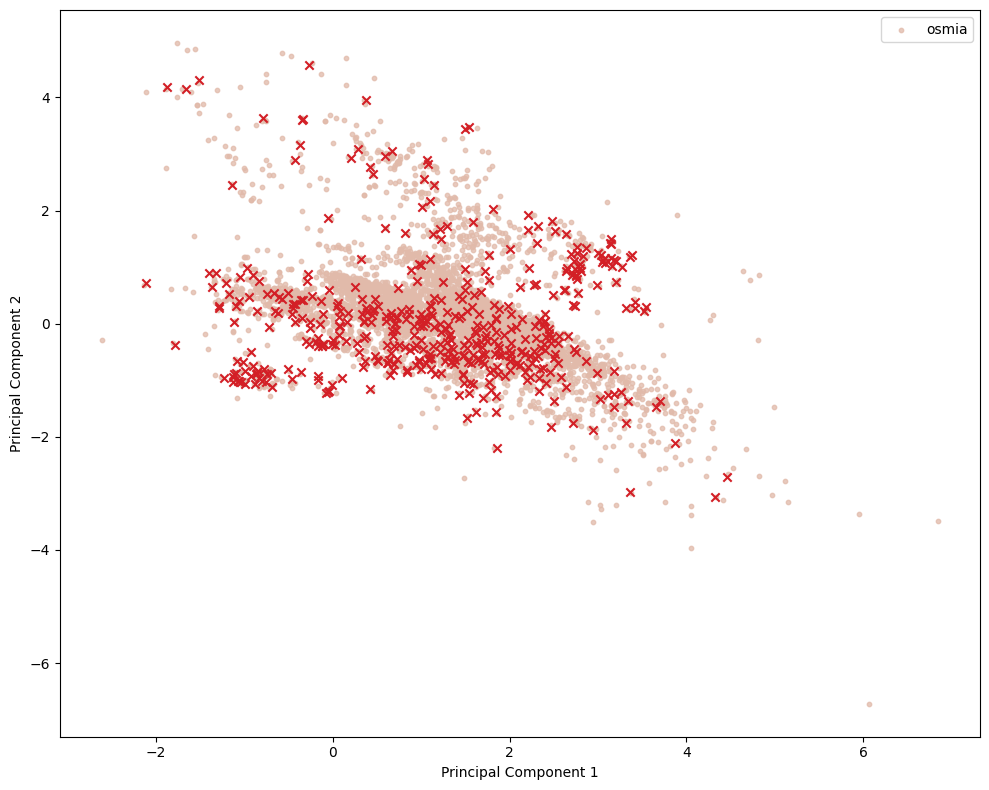

In [42]:
plt.figure(figsize=(10, 8))
# Plot all PCA points
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.76)
    break
# plt.scatter(X_pca[y == 'osmia', 0], X_pca[y == 'osmia', 1], label='osmia', color='green')
# plt.scatter(X_pca[y == 'america', 0], X_pca[y == 'america', 1], label='America', color='blue')

# Highlight overlapping points
plt.scatter(close_america_points[:, 0], close_america_points[:, 1], c='#D31F26', marker='x')

# Labeling the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('PCA of the Dataset with Overlapping Points Highlighted')
plt.legend()

plt.tight_layout()
# plt.savefig('figures/pca_new.png')

In [46]:
test_points = america_points.iloc[close_points_indices]
# test_points.to_csv('test_points_new.csv', index=False)

In [49]:

min_val = np.min(shortest_distances_only)
max_val = np.max(shortest_distances_only)

shortest_distances_norm = (shortest_distances_only - min_val) / (max_val - min_val)
shortest_distances_norm

array([0.3117521 , 0.28735403, 0.21977863, ..., 0.43590009, 0.44557818,
       0.3744573 ])

1.0

In [47]:
america_points['dist'] = shortest_distances_only

In [ ]:
america_points.to_csv('distance_points_no_norm.csv', index=False)

In [50]:
indexes = np.where(shortest_distances_norm < 0.05)[0]
close_america_points_norm = america_points[indexes]

KeyError: "None of [Index([   4,    5,    6,   12,   13,   22,   23,   30,   31,   39,\n       ...\n       6187, 6192, 6196, 6274, 6281, 6365, 6372, 6457, 6458, 6464],\n      dtype='int64', length=1970)] are in the [columns]"

6546

In [ ]:
america_only = combined[combined['group'] == 'america']
america_only['dist'] = shortest_distances_norm


/tmp/ipykernel_570383/3556539387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america_only['dist'] = shortest_distances_norm


,bio_13,bio_11,bio_9,bio_3,elev,bio_5,bio_6,bio_17,bio_10,bio_2,...,bio_4,bio_19,bio_7,bio_14,bio_18,ndvi,group,PC1,PC2,dist
32851,33.0,17.050000,21.633333,61.215750,39,36.7,7.5,1.0,28.133333,17.875000,...,445.64795,41.0,29.200000,0.0,76.0,0.135494,america,-5.347023,-13.025037,0.367850
32852,77.0,17.033333,23.733334,59.406780,390,37.8,8.3,1.0,28.916666,17.525000,...,484.37927,45.0,29.500000,0.0,180.0,0.144761,america,-5.587475,-12.067012,0.310290
32853,188.0,19.433334,23.283333,59.825870,36,36.7,9.9,7.0,29.933334,16.033333,...,447.65973,55.0,26.800001,2.0,349.0,0.299956,america,-2.957475,-9.408488,0.107113
32854,251.0,19.783333,24.316668,59.923664,360,36.7,10.5,16.0,28.600000,15.700000,...,367.71100,91.0,26.200000,4.0,554.0,0.388679,america,-1.283712,-6.879553,0.023887
32855,298.0,11.016666,14.716667,63.143940,2233,25.2,3.2,56.0,17.533333,13.891667,...,277.82810,194.0,22.000000,11.0,699.0,0.406841,america,0.169307,-0.042641,0.001735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39392,104.0,-21.450000,-19.916666,21.848290,505,17.6,-29.2,137.0,10.650000,10.225000,...,1295.78710,144.0,46.800003,39.0,269.0,0.192897,america,-6.293734,9.569087,0.545186
39393,105.0,-20.833334,-20.833334,20.916483,466,16.6,-28.5,149.0,10.166667,9.433333,...,1255.31750,149.0,45.100000,43.0,284.0,-0.086839,america,-6.106080,9.627762,0.540342
39394,110.0,-20.950000,-19.500000,22.419355,500,17.9,-28.6,160.0,10.750000,10.425000,...,1279.04460,162.0,46.500000,47.0,284.0,0.155556,america,-5.699338,9.771478,0.531834
39395,107.0,-20.066666,-20.066666,21.581196,466,15.3,-27.6,173.0,9.533334,9.258333,...,1193.07500,173.0,42.900000,52.0,290.0,-0.082520,america,-4.983326,9.925780,0.499301


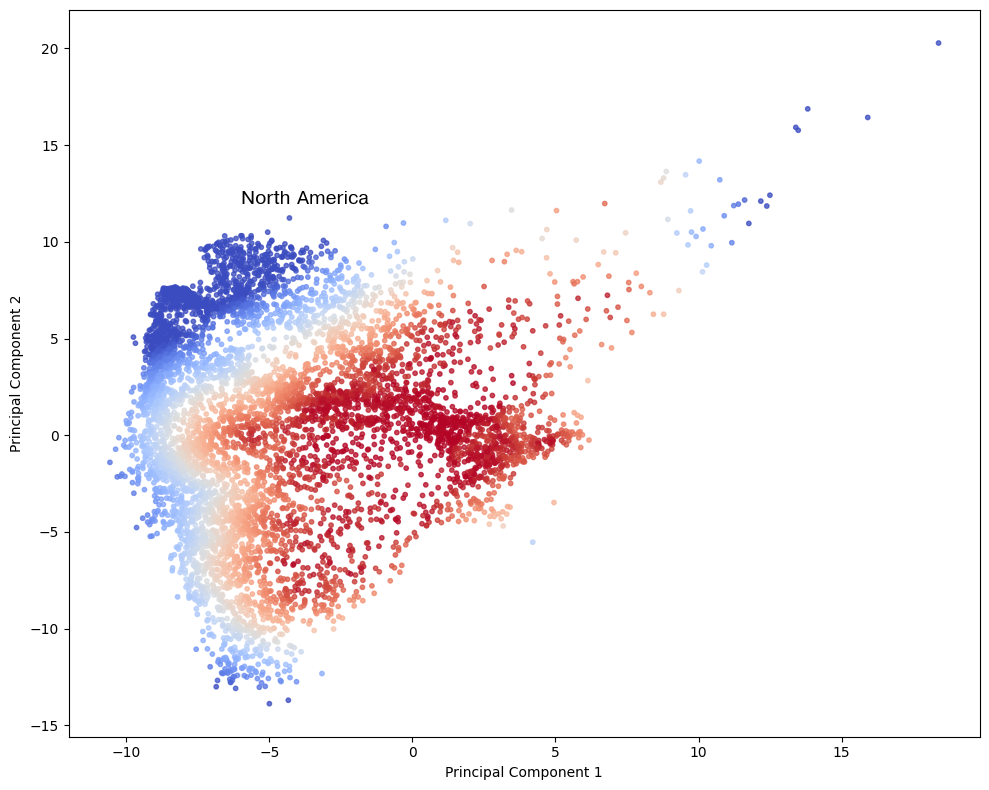

In [ ]:
plt.figure(figsize=(10, 8))


plt.scatter(america_only['PC1'], america_only['PC2'], c=america_only['dist'], cmap='coolwarm_r', vmin=0, vmax=.4, label='North America', s=10, marker= 'o', alpha=0.76)


# plt.scatter(X_pca[y == 'osmia', 0], X_pca[y == 'osmia', 1], label='osmia', color='green')
# plt.scatter(X_pca[y == 'america', 0], X_pca[y == 'america', 1], label='America', color='blue')

# Highlight overlapping points
#plt.scatter(close_america_points_norm[:, 0], close_america_points_norm[:, 1], c='#D31F26', s=10, marker= 'o')

# Labeling the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('PCA of the Dataset with Overlapping Points Highlighted')
plt.text(-6, 12, 'North America', fontsize=14, color='k', fontname='Helvetica')

plt.tight_layout()
plt.savefig('figures/pca_colormapped.png', format='png', dpi=300)

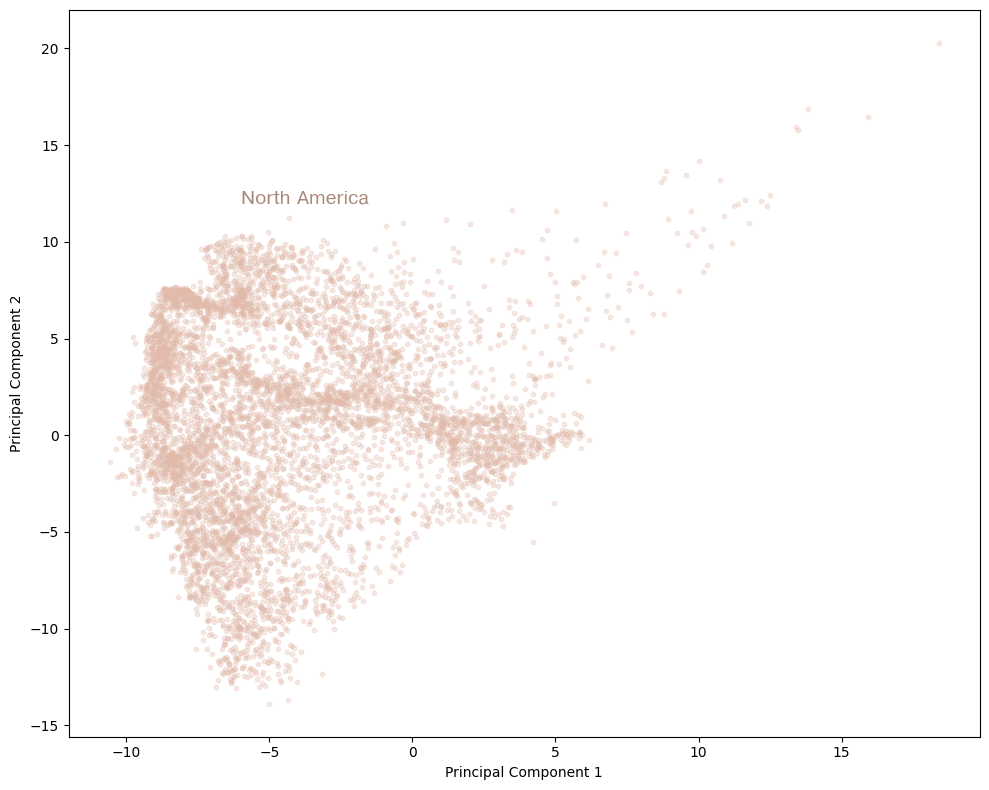

In [ ]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

unique_labels = sorted(combined['group'].unique())  
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.3)
    break
plt.text(-6, 12, 'North America', fontsize=14, color='#a9887a', fontname='Helvetica')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.savefig('figures/pca_america.png', format='png', dpi=300)

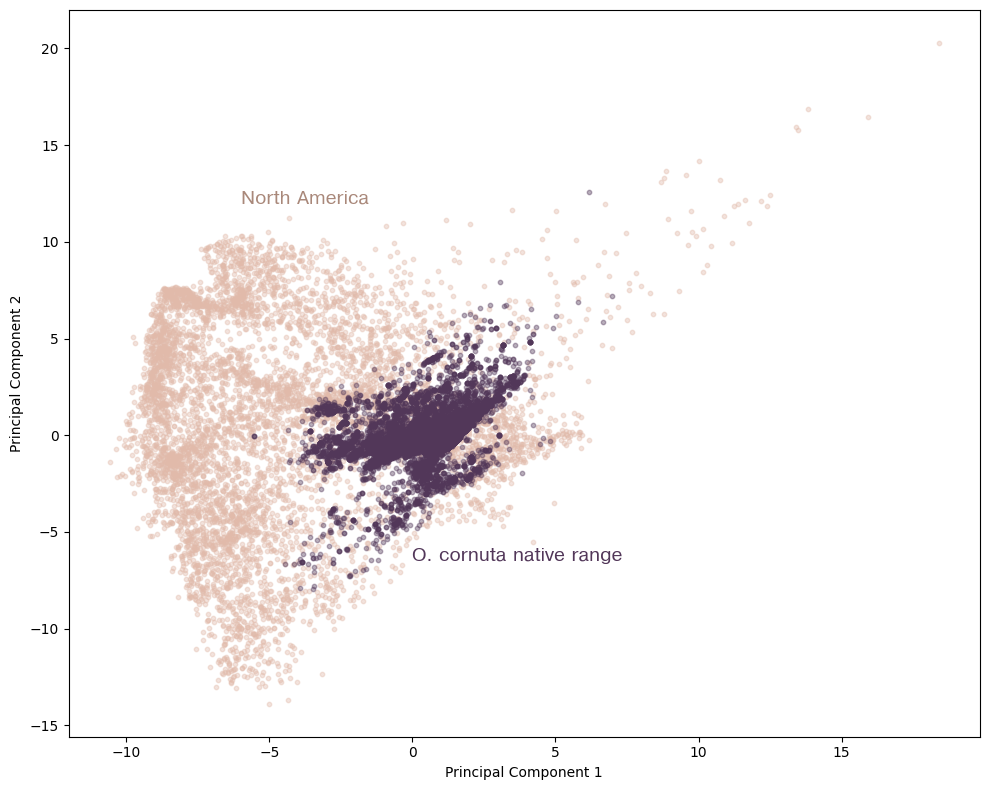

In [ ]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

unique_labels = sorted(combined['group'].unique())  
for i, label in enumerate(unique_labels):
    subset = combined[combined['group'] == label]  
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.4)

plt.text(-6, 12, 'North America', fontsize=14, color='#a9887a', fontname='Helvetica')
plt.text(0, -6.5, 'O. cornuta native range', fontsize=14, color='#523759', fontname='Helvetica')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.savefig('figures/pca_combined.png', format='png', dpi=300)